#**Problem Statement**

Walmart Inc. wants to analyze customer purchase behavior during Black Friday sales to identify whether demographic factors (such as gender, age, marital status, occupation, and city category) influence purchase amount. Specifically, management wants to determine whether there are significant differences in spending habits between male and female customers, and how other customer characteristics impact their purchasing patterns. This analysis will help Walmart design targeted marketing campaigns, personalized promotions, and product placement strategies to maximize sales and customer satisfaction.

#**Objective**

To identify spending patterns across gender and other factors to enable data-driven business strategies.

#**Import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**Download required dataset**

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 206MB/s]


#**Loading the data**

In [ ]:
df=pd.read_csv('walmart_data.csv')
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


#**Basic Data Analysis**

In [ ]:
#to find the shape of dataframe (rows,columns)
df.shape

(550068, 10)

In [ ]:
#to find datatype of column present in dataframe
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
#Conversion categoricals to 'category' dtype
categorical_cols = ["Gender","Product_ID","Age","City_Category","Stay_In_Current_City_Years"]

for col in categorical_cols:
    df[col] = df[col].astype("category")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(5)
memory usage: 24.3 MB


In [ ]:
#create bins of age on the basis of life stages : 0-17, 18-25, 26-35, 36-50, 51+ years.
age_bins = {
    '0-17': 'Child',
    '18-25': 'Young_Adult',
    '26-35': 'Adult',
    '46-50': 'Senior',
    '55+': 'Old'
}
df['Age_Group'] = df['Age'].map(age_bins)


#**Detect Outliers**

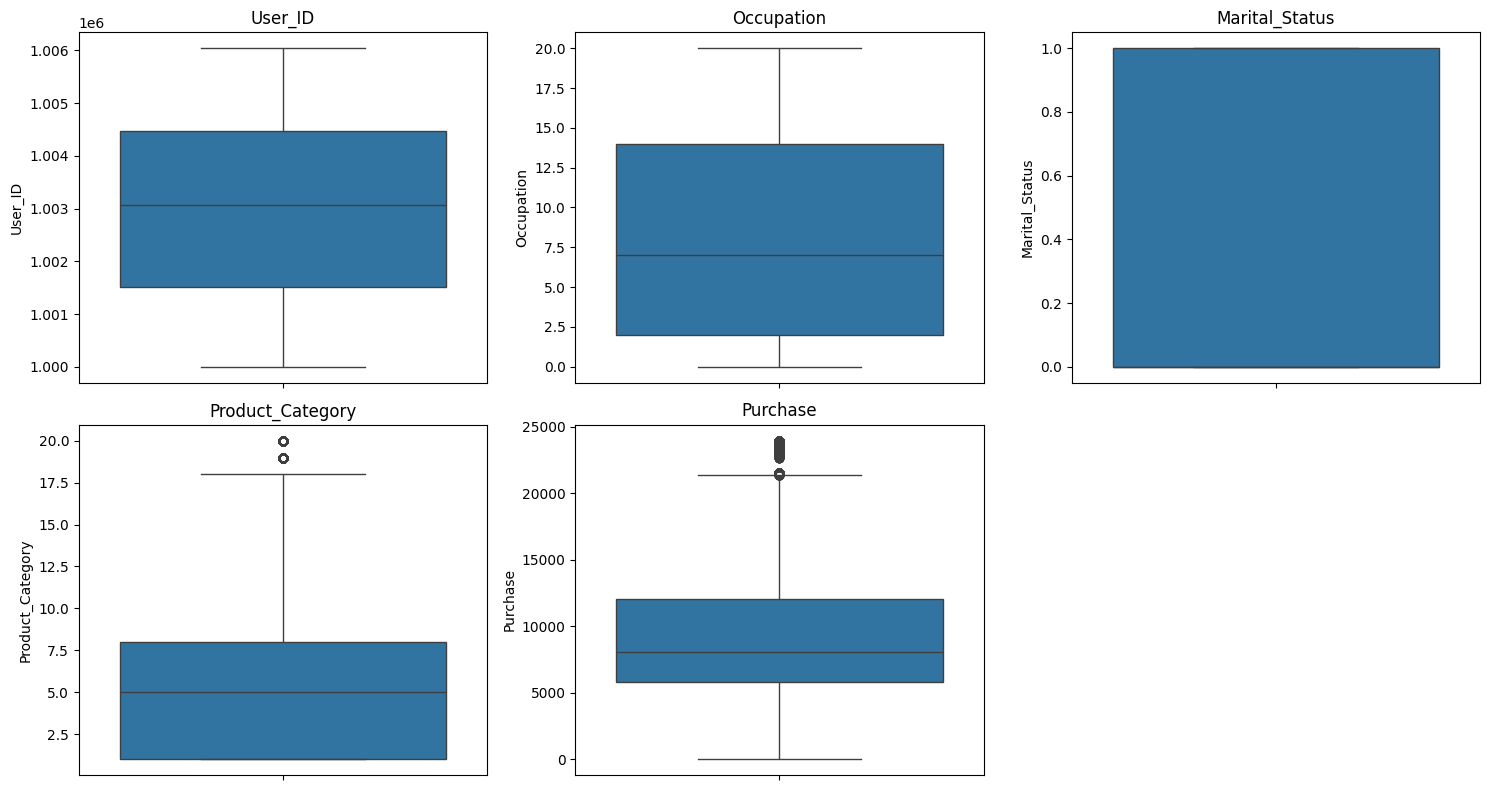

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define subplot grid (approx. square layout)
n_cols = 3   # number of plots per row (you can adjust this)
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))  # adjust figure size

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])
    plt.title(f"{col}", fontsize=12)
    plt.tight_layout()

plt.show()

**Insights** :-

1.   No outliers has seen in User_Id, Occupation, Marital_Status field.
2.   Outliers appear at the upper end (18, 19, 20) in Product_Category field which could represent luxury or specialized products.
3.   Outliers at the top end (20k–24k) in Purchase field represent big-ticket purchases.

#**Univariate Analysis**

###Continuous Variables

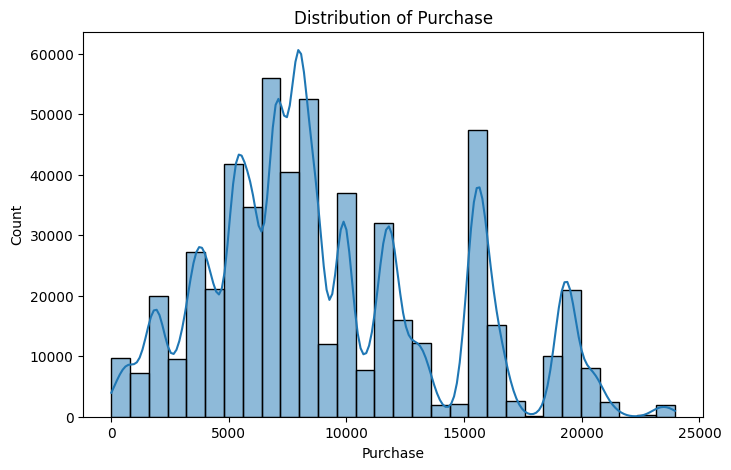

In [ ]:
continuous_cols = ['Purchase']
for col in continuous_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


**Insights**:-

1.   Most customers spend around ₹5,000–₹10,000, making it the core purchase segment.
2.   There are distinct groups of customers who purchase in higher ranges (₹12,000–₹15,000 and ₹18,000–₹20,000), which could represent premium buyers.
3.   Very high purchase amounts are rare, suggesting a niche segment.



###Categorical Variables

Categorical columns: Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


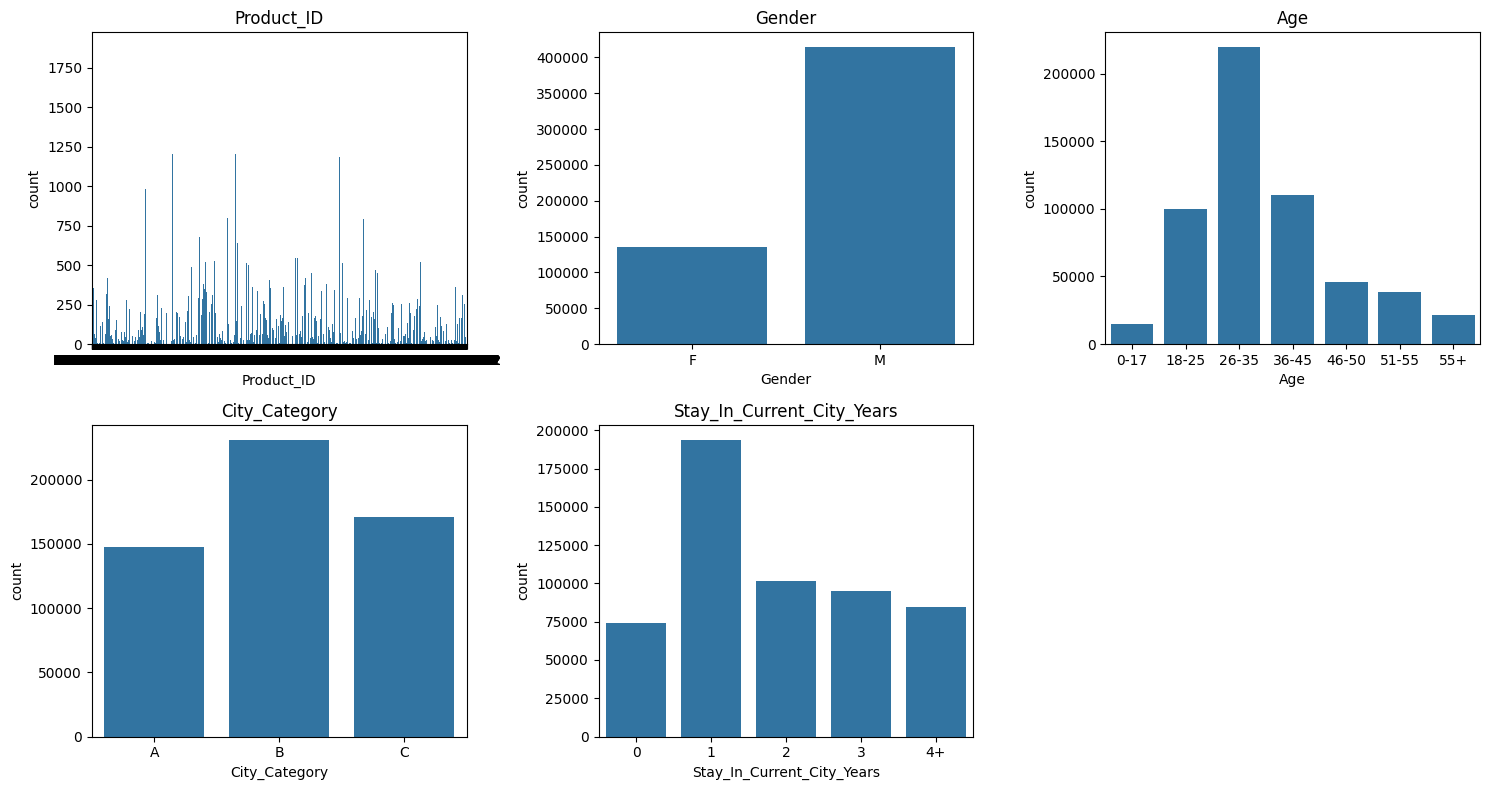

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select category columns (object + category dtypes)
category_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", category_cols)

if len(category_cols) > 0:
    # Define subplot grid
    n_cols = 3   # number of plots per row
    n_rows = math.ceil(len(category_cols) / n_cols)

    # Set figure size (width, height)
    plt.figure(figsize=(n_cols*5, n_rows*4))

    for i, col in enumerate(category_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(x=df[col])
        plt.title(f"{col}", fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No categorical columns found in your dataframe.")


Insights:-

1.   Demographics:

    *   Core buyers are males aged 26–35
    *   Target audience should focus on this segment for promotions and product recommendations.

2.   Geography:

    *   City B is the top-performing city, followed by City C.
    *   City A has fewer buyers but could be explored for growth opportunities.

3.   Customer Tenure:

    *   People who have stayed 1–3 years in a city purchase the most.
    *   Businesses could tailor marketing to this segment as they are in an “active buying phase.”

4.   Product Distribution:

    *   A few products are very popular (potential flagships).
    *   The majority are niche, so strategies like bundling or discounts could help boost their sales


#**Bi-variate Analysis**

###Purchase Distribution VS Age Group

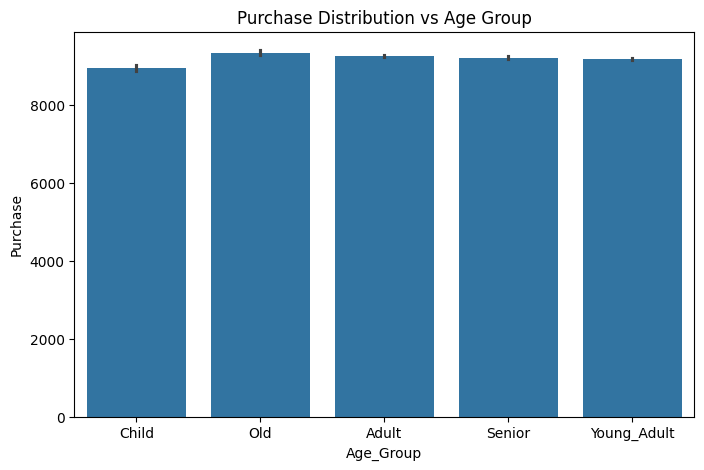

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.barplot(x='Age_Group', y='Purchase', data=df)
plt.title("Purchase Distribution vs Age Group")
plt.show()





**Insights**:-

While average purchase amount per age group is stable, the overall contribution to revenue will depend on the number of customers in each age group (with 26–35 dominating).

###Purchase Distribution VS Gender

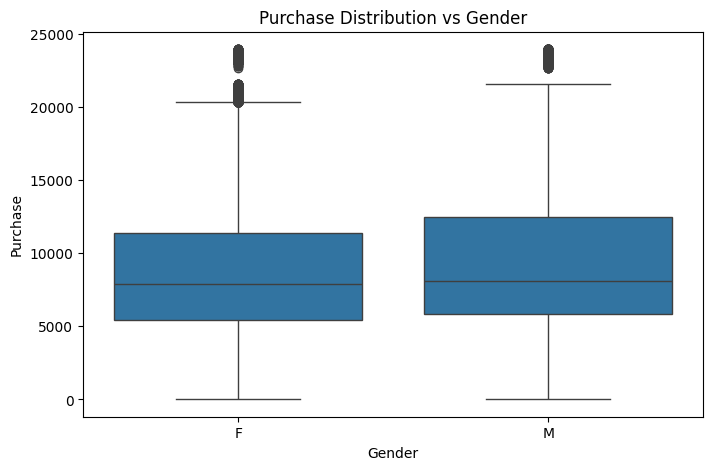

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title("Purchase Distribution vs Gender")
plt.show()

**Insights**:-

1.   Median purchase is almost the same for both genders (~7.5–8k).
2.   Males show slightly more variation in spending compared to females.
3.   Both genders have outliers with very high purchases (20k–25k).
4.   Overall, purchase patterns are quite similar across genders, with only minor differences.

###Purchase Distribution VS Marital_Status

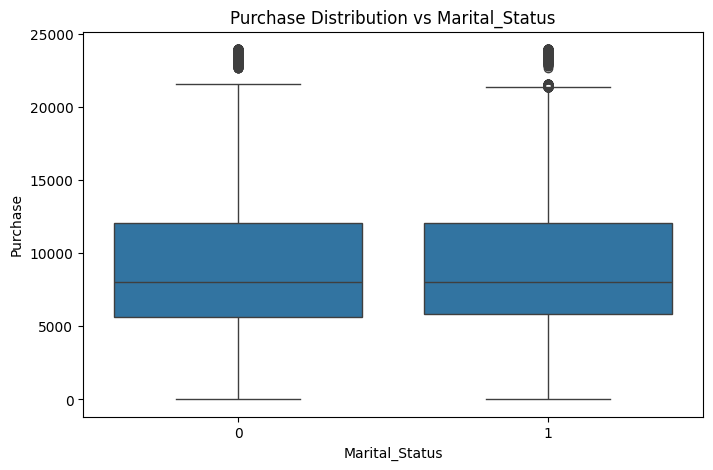

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(x='Marital_Status', y='Purchase', data=df)
plt.title("Purchase Distribution vs Marital_Status")
plt.show()

**Insights**:-

1.   Median purchase is almost the same for both category (~7.5–8k).
2.   Both categories have outliers with very high purchases (22k–25k).
3.   Overall, purchase patterns are quite similar across categories, with only minor differences


#**Correlation Analysis**

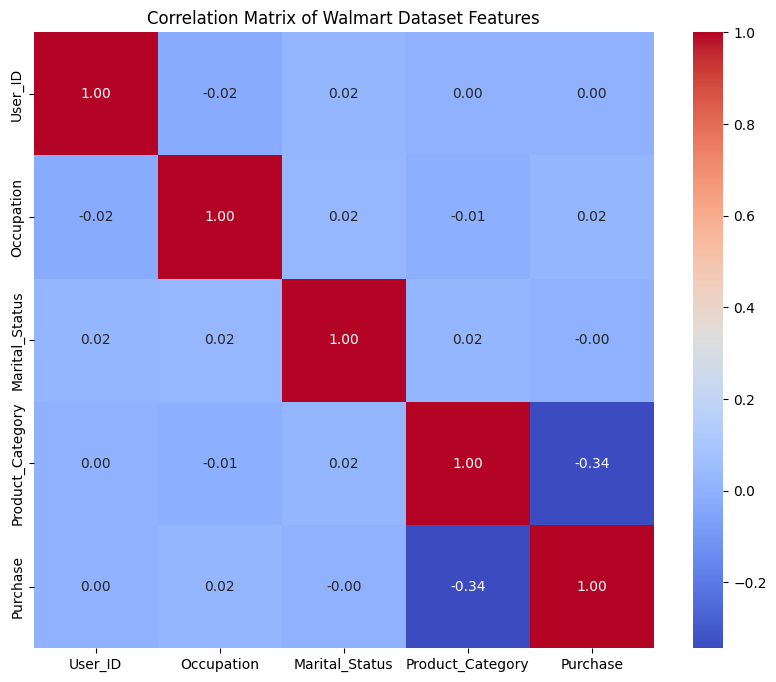

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Walmart Dataset Features')
plt.show()


**Insights**:-

| Feature Pair                       | Correlation | Insight                                           |
| ---------------------------------- | ----------- | ------------------------------------------------- |
| Product_Category vs Purchase       | -0.34       | Higher category number may lead to lower purchase |
| Marital_Status vs Purchase         | ~0.00       | No influence                                      |
| User_ID vs Anything                | ~0.00       | Should not be used for correlation                |
| Product_Category vs Marital_Status | 0.02        | No real relation                                  |


#**Data exploration**

##**Analysis on basis of gender**

###Amount spent per transaction of all the female customers

In [ ]:
#Filter dataset for female customers
female_df = df[df['Gender'] == 'F']

In [ ]:
#Compute average amount spent per transaction (female only)
female_avg_purchase = female_df['Purchase'].mean()
print("Average amount spent per transaction (Females):", female_avg_purchase)

Average amount spent per transaction (Females): 8734.565765155476


###Amount spent per transaction of all the male customers

In [ ]:
#Filter dataset for male customers
male_df = df[df['Gender'] == 'M']

In [ ]:
#Compute average amount spent per transaction (male only)
male_avg_purchase = male_df['Purchase'].mean()
print("Average amount spent per transaction (Males):", male_avg_purchase)

Average amount spent per transaction (Males): 9437.526040472265


**Insights**:-
From the sample, males spend more per transaction than females during Black Friday at Walmart

###Confidence Interval of female/male purchases at 90% Confidence.

In [ ]:
import scipy.stats as st
import numpy as np

# Female group
female_mean = female_df['Purchase'].mean()
female_std = female_df['Purchase'].std()
n_female = female_df.shape[0]

# Male group
male_mean = male_df['Purchase'].mean()
male_std = male_df['Purchase'].std()
n_male = male_df.shape[0]

# 90% Confidence Intervals
confidence = 0.90

#confidence interval of female purchase
Female_CI=st.norm.interval(confidence, loc=female_mean, scale=female_std/np.sqrt(n_female))
Male_CI=st.norm.interval(confidence, loc=male_mean, scale=male_std/np.sqrt(n_male))

print("90% CI for Female Average Spend:", Female_CI)
print("90% CI for Male Average Spend:", Male_CI)


90% CI for Female Average Spend: (np.float64(8713.287834648021), np.float64(8755.84369566293))
90% CI for Male Average Spend: (np.float64(9424.512497305488), np.float64(9450.539583639042))


###Confidence Interval of female/male purchases at 95% Confidence.

In [ ]:
import scipy.stats as st
import numpy as np

# Female group
female_mean = female_df['Purchase'].mean()
female_std = female_df['Purchase'].std()
n_female = female_df.shape[0]

# Male group
male_mean = male_df['Purchase'].mean()
male_std = male_df['Purchase'].std()
n_male = male_df.shape[0]

# 95% Confidence Intervals
confidence = 0.95

#confidence interval of female purchase
Female_CI=st.norm.interval(confidence, loc=female_mean, scale=female_std/np.sqrt(n_female))
Male_CI=st.norm.interval(confidence, loc=male_mean, scale=male_std/np.sqrt(n_male))

print("95% CI for Female Average Spend:", Female_CI)
print("95% CI for Male Average Spend:", Male_CI)


95% CI for Female Average Spend: (np.float64(8709.21154714068), np.float64(8759.919983170272))
95% CI for Male Average Spend: (np.float64(9422.01944736257), np.float64(9453.032633581959))


###Confidence Interval of female/male purchases at 99% Confidence.

In [ ]:
import scipy.stats as st
import numpy as np

# Female group
female_mean = female_df['Purchase'].mean()
female_std = female_df['Purchase'].std()
n_female = female_df.shape[0]

# Male group
male_mean = male_df['Purchase'].mean()
male_std = male_df['Purchase'].std()
n_male = male_df.shape[0]

# 99% Confidence Intervals
confidence = 0.99

#confidence interval of female purchase
Female_CI=st.norm.interval(confidence, loc=female_mean, scale=female_std/np.sqrt(n_female))
Male_CI=st.norm.interval(confidence, loc=male_mean, scale=male_std/np.sqrt(n_male))

print("99% CI for Female Average Spend:", Female_CI)
print("99% CI for Male Average Spend:", Male_CI)


99% CI for Female Average Spend: (np.float64(8701.24467443839), np.float64(8767.88685587256))
99% CI for Male Average Spend: (np.float64(9417.146922669479), np.float64(9457.90515827505))


**Insights**:-


1.   Male spend is consistently higher than female spend.
2.   Narrow confidence intervals → precise estimates.
3.   Increasing CI level widens the range slightly, but the separation remains.
4.   Effect size is large.



###Plotting of above CI Analysis of Female and Male Purchases

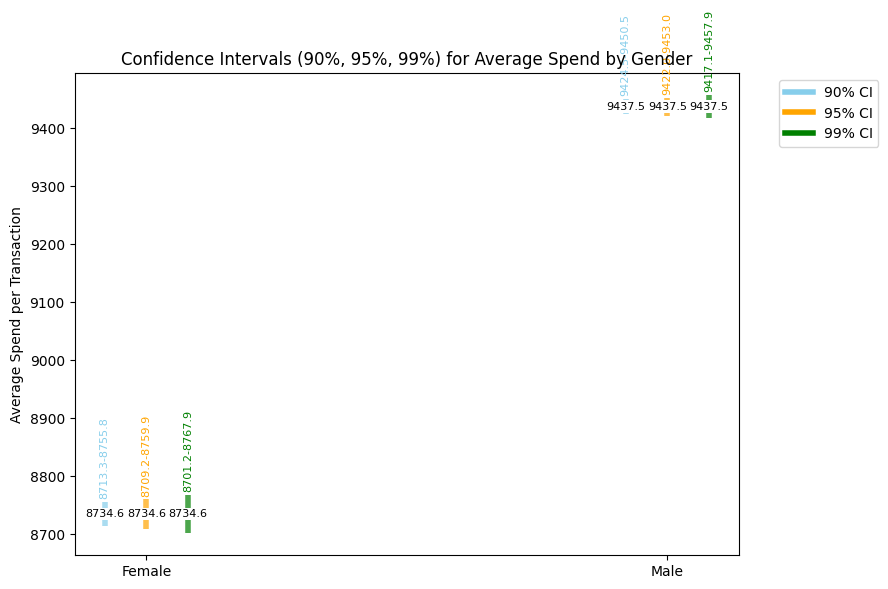

In [ ]:
import matplotlib.pyplot as plt

# Confidence intervals data
genders = ["Female", "Male"]
ci_levels = ["90%", "95%", "99%"]

female_cis = [(8713.29, 8755.84), (8709.21, 8759.92), (8701.24, 8767.89)]
male_cis = [(9424.51, 9450.54), (9422.02, 9453.03), (9417.15, 9457.91)]

# Colors for different CI levels
colors = {"90%": "skyblue", "95%": "orange", "99%": "green"}

fig, ax = plt.subplots(figsize=(9,6))

# Plot confidence intervals for each gender with annotations
for j, gender in enumerate(genders):
    cis = female_cis if gender == "Female" else male_cis
    for i, (low, high) in enumerate(cis):
        mean_val = (low + high) / 2

        # Plot CI
        ax.vlines(j + (i-1)*0.08, low, high, color=colors[ci_levels[i]], linewidth=4, alpha=0.7)
        ax.plot(j + (i-1)*0.08, mean_val, marker="o", color=colors[ci_levels[i]])

        # Add annotation of CI values
        ax.text(j + (i-1)*0.08, high+5, f"{low:.1f}-{high:.1f}",
                ha='center', va='bottom', fontsize=8, rotation=90, color=colors[ci_levels[i]])

        # Add mean value label
        ax.text(j + (i-1)*0.08, mean_val, f"{mean_val:.1f}",
                ha='center', va='center', fontsize=8, color="black",
                bbox=dict(facecolor="white", edgecolor="none", pad=1))

# Formatting
ax.set_xticks(range(len(genders)))
ax.set_xticklabels(genders)
ax.set_ylabel("Average Spend per Transaction")
ax.set_title("Confidence Intervals (90%, 95%, 99%) for Average Spend by Gender")
ax.legend([plt.Line2D([0], [0], color=colors[level], lw=4) for level in ci_levels],
          [f"{level} CI" for level in ci_levels],
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Insights**:-

1.   Males consistently spend more than females.
2.   No overlap in confidence intervals.
3.   Narrow intervals = precise estimates
4.   Trend is stable across CI levels.

**Business Impact**:-

By recognizing and leveraging this difference, Walmart can increase overall sales and profitability through gender-specific strategies.



##**Analysis on basis of Marital Status**

###Amount spent per transaction of all the married customers

In [ ]:
#Filter dataset for married customers
married_df = df[df['Marital_Status'] == 1]
married_avg_purchase = married_df['Purchase'].mean()
print("Average amount spent per transaction (Married):", married_avg_purchase)

Average amount spent per transaction (Married): 9261.174574082374


###Amount spent per transaction of all the un-married customers

In [ ]:
unmarried_df = df[df['Marital_Status'] == 0]
unmarried_avg_purchase = unmarried_df['Purchase'].mean()
print("Average amount spent per transaction (Unmarried):", unmarried_avg_purchase)

Average amount spent per transaction (Unmarried): 9265.907618921507


###Confidence Interval of married/un-married customer purchases at 90% Confidence.

In [ ]:
import scipy.stats as st
import numpy as np

# Married group
married_mean = married_df['Purchase'].mean()
married_std = married_df['Purchase'].std()
n_married = married_df.shape[0]

# Unmarried group
unmarried_mean = unmarried_df['Purchase'].mean()
unmarried_std = unmarried_df['Purchase'].std()
n_unmarried = unmarried_df.shape[0]

# 90% Confidence Intervals
confidence = 0.90

#confidence interval of married/unmarried purchase
Married_CI=st.norm.interval(confidence, loc=married_mean, scale=married_std/np.sqrt(n_married))
Unmarried_CI=st.norm.interval(confidence, loc=unmarried_mean, scale=unmarried_std/np.sqrt(n_unmarried))

print("90% CI for Married Average Spend:", Married_CI)
print("90% CI for Unmarried Average Spend:", Unmarried_CI)


90% CI for Married Average Spend: (np.float64(9243.790713903045), np.float64(9278.558434261702))
90% CI for Unmarried Average Spend: (np.float64(9251.39638582367), np.float64(9280.418852019344))


###Confidence Interval of married/un-married customer purchases at 95% Confidence.

In [ ]:
import scipy.stats as st
import numpy as np

# Married group
married_mean = married_df['Purchase'].mean()
married_std = married_df['Purchase'].std()
n_married = married_df.shape[0]

# Unmarried group
unmarried_mean = unmarried_df['Purchase'].mean()
unmarried_std = unmarried_df['Purchase'].std()
n_unmarried = unmarried_df.shape[0]

# 95% Confidence Intervals
confidence = 0.95

#confidence interval of married/unmarried purchase
Married_CI=st.norm.interval(confidence, loc=married_mean, scale=married_std/np.sqrt(n_married))
Unmarried_CI=st.norm.interval(confidence, loc=unmarried_mean, scale=unmarried_std/np.sqrt(n_unmarried))

print("95% CI for Married Average Spend:", Married_CI)
print("95% CI for Unmarried Average Spend:", Unmarried_CI)


95% CI for Married Average Spend: (np.float64(9240.460427057078), np.float64(9281.888721107669))
95% CI for Unmarried Average Spend: (np.float64(9248.61641818668), np.float64(9283.198819656332))


###Confidence Interval of married/un-married customer purchases at 99% Confidence.

In [ ]:
import scipy.stats as st
import numpy as np

# Married group
married_mean = married_df['Purchase'].mean()
married_std = married_df['Purchase'].std()
n_married = married_df.shape[0]

# Unmarried group
unmarried_mean = unmarried_df['Purchase'].mean()
unmarried_std = unmarried_df['Purchase'].std()
n_unmarried = unmarried_df.shape[0]

# 95% Confidence Intervals
confidence = 0.99

#confidence interval of married/unmarried purchase
Married_CI=st.norm.interval(confidence, loc=married_mean, scale=married_std/np.sqrt(n_married))
Unmarried_CI=st.norm.interval(confidence, loc=unmarried_mean, scale=unmarried_std/np.sqrt(n_unmarried))

print("99% CI for Married Average Spend:", Married_CI)
print("99% CI for Unmarried Average Spend:", Unmarried_CI)


99% CI for Married Average Spend: (np.float64(9233.951570329937), np.float64(9288.39757783481))
99% CI for Unmarried Average Spend: (np.float64(9243.183129136169), np.float64(9288.632108706845))


**Insights**:-
1.   CIs show strong overlap which represents that the average spends of married and unmarried customers are statistically similar.
2.   No significant difference in mean spending.
3.   High precision but low effect size.


####Plotting of above CI Analysis of Married and Un-married Purchases

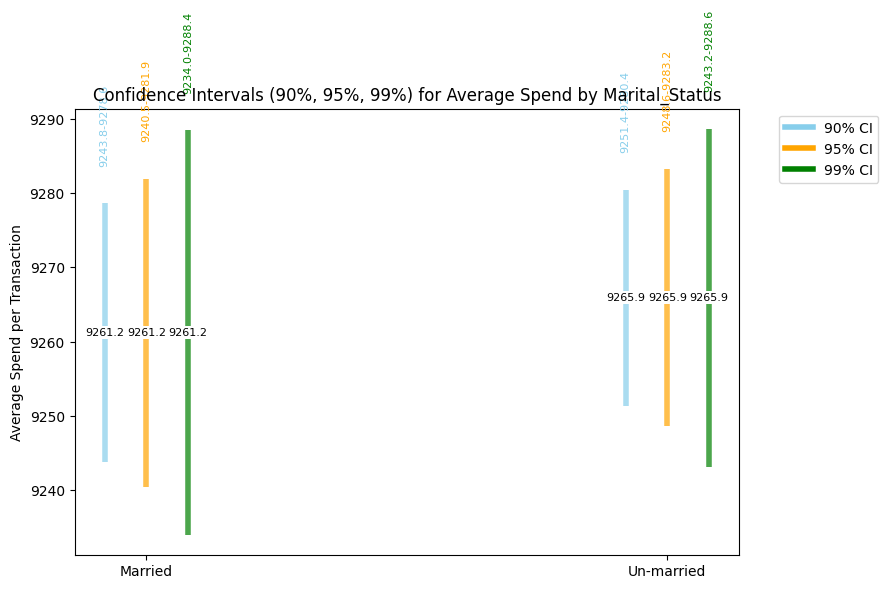

In [ ]:
import matplotlib.pyplot as plt

# Confidence intervals data
Marital_status = ["Married", "Un-married"]
ci_levels = ["90%", "95%", "99%"]

married_cis = [(9243.8, 9278.6), (9240.5, 9281.9), (9234.0, 9288.4)]
unmarried_cis = [(9251.4, 9280.4), (9248.6, 9283.2), (9243.2, 9288.6)]

# Colors for different CI levels
colors = {"90%": "skyblue", "95%": "orange", "99%": "green"}

fig, ax = plt.subplots(figsize=(9,6))

# Plot confidence intervals for each marital_status with annotations
for j, ms in enumerate(Marital_status):
    cis = married_cis if ms == "Married" else unmarried_cis
    for i, (low, high) in enumerate(cis):
        mean_val = (low + high) / 2

        # Plot CI
        ax.vlines(j + (i-1)*0.08, low, high, color=colors[ci_levels[i]], linewidth=4, alpha=0.7)
        ax.plot(j + (i-1)*0.08, mean_val, marker="o", color=colors[ci_levels[i]])

        # Add annotation of CI values
        ax.text(j + (i-1)*0.08, high+5, f"{low:.1f}-{high:.1f}",
                ha='center', va='bottom', fontsize=8, rotation=90, color=colors[ci_levels[i]])

        # Add mean value label
        ax.text(j + (i-1)*0.08, mean_val, f"{mean_val:.1f}",
                ha='center', va='center', fontsize=8, color="black",
                bbox=dict(facecolor="white", edgecolor="none", pad=1))

# Formatting
ax.set_xticks(range(len(Marital_status)))
ax.set_xticklabels(Marital_status)
ax.set_ylabel("Average Spend per Transaction")
ax.set_title("Confidence Intervals (90%, 95%, 99%) for Average Spend by Marital_Status")
ax.legend([plt.Line2D([0], [0], color=colors[level], lw=4) for level in ci_levels],
          [f"{level} CI" for level in ci_levels],
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Insights**:-

1.   Unlike gender-based differences (where males spend significantly more), marital status does not influence average spending.
2.   The data suggests that whether a customer is married or unmarried, their per-transaction spend is essentially the same.

**Business Implication**:-

1.   Marital status should not be used as a segmentation factor for pricing, promotions, or marketing — it won’t drive meaningful differences in spend.




##**Analysis on basis of Age Group**

###Amount spend per transaction of *Child* customer

In [ ]:
#Filter dataset for child customers
child_df = df[df['Age_Group'] == 'Child']
child_avg_purchase = child_df['Purchase'].mean()
print("Average amount spent per transaction (Child):", child_avg_purchase)

Average amount spent per transaction (Child): 8933.464640444974


###Amount spend per transaction of *Young Adult* customer

In [ ]:
#Filter dataset for Young_adult customers
Young_df = df[df['Age_Group'] == 'Young_Adult']
Young_avg_purchase = Young_df['Purchase'].mean()
print("Average amount spent per transaction (Young_Adult):", Young_avg_purchase)

Average amount spent per transaction (Young_Adult): 9169.663606261289


###Amount spend per transaction of *Adult* customer

In [ ]:
#Filter dataset for Adult customers
Adult_df = df[df['Age_Group'] == 'Adult']
Adult_avg_purchase = Adult_df['Purchase'].mean()
print("Average amount spent per transaction (Adult):", Adult_avg_purchase)

Average amount spent per transaction (Adult): 9252.690632869888


###Amount spend per transaction of *Senior* customer

In [ ]:
#Filter dataset for Senior customers
Senior_df = df[df['Age_Group'] == 'Senior']
Senior_avg_purchase = Senior_df['Purchase'].mean()
print("Average amount spent per transaction (Senior):", Senior_avg_purchase)

Average amount spent per transaction (Senior): 9208.625697468327


###Amount spend per transaction of *Old* customer

In [ ]:
#Filter dataset for Old customers
Old_df = df[df['Age_Group'] == 'Old']
Old_avg_purchase = Old_df['Purchase'].mean()
print("Average amount spent per transaction (Old):", Old_avg_purchase)

Average amount spent per transaction (Old): 9336.280459449405


###Confidence Interval of different Age-Group customer purchases at 90% Confidence.

In [ ]:
from re import S
import scipy.stats as st
import numpy as np

# Child group
child_mean = child_df['Purchase'].mean()
child_std = child_df['Purchase'].std()
n_child = child_df.shape[0]

# Young_adult group
Young_mean = Young_df['Purchase'].mean()
Young_std = Young_df['Purchase'].std()
n_Young = Young_df.shape[0]

# Adult group
Adult_mean = Adult_df['Purchase'].mean()
Adult_std = Adult_df['Purchase'].std()
n_Adult = Adult_df.shape[0]

# Senior group
Senior_mean = Senior_df['Purchase'].mean()
Senior_std = Senior_df['Purchase'].std()
n_Senior = Senior_df.shape[0]

# Old group
Old_mean = Old_df['Purchase'].mean()
Old_std = Old_df['Purchase'].std()
n_Old = Old_df.shape[0]

# 90% Confidence Intervals
confidence = 0.90

#confidence interval of different age group purchase
Child_CI=st.norm.interval(confidence, loc=child_mean, scale=child_std/np.sqrt(n_child))
Young_CI=st.norm.interval(confidence, loc=Young_mean, scale=Young_std/np.sqrt(n_Young))
Adult_CI=st.norm.interval(confidence, loc=Adult_mean, scale=Adult_std/np.sqrt(n_Adult))
Senior_CI=st.norm.interval(confidence, loc=Senior_mean, scale=Senior_std/np.sqrt(n_Senior))
Old_CI=st.norm.interval(confidence, loc=Old_mean, scale=Old_std/np.sqrt(n_Old))

print("90% CI for Child Average Spend:", Child_CI)
print("90% CI for Young_Adult Average Spend:", Young_CI)
print("90% CI for Adult Average Spend:", Adult_CI)
print("90% CI for Senior Average Spend:", Senior_CI)
print("90% CI for Old Average Spend:", Old_CI)


90% CI for Child Average Spend: (np.float64(8865.053694527898), np.float64(9001.87558636205))
90% CI for Young_Adult Average Spend: (np.float64(9143.433031607847), np.float64(9195.89418091473))
90% CI for Adult Average Spend: (np.float64(9235.103000581124), np.float64(9270.278265158651))
90% CI for Senior Average Spend: (np.float64(9170.406859081897), np.float64(9246.844535854758))
90% CI for Old Average Spend: (np.float64(9280.067707714425), np.float64(9392.493211184385))


###Confidence Interval of different Age-Group customer purchases at 95% Confidence.

In [ ]:
from re import S
import scipy.stats as st
import numpy as np

# Child group
child_mean = child_df['Purchase'].mean()
child_std = child_df['Purchase'].std()
n_child = child_df.shape[0]

# Young_adult group
Young_mean = Young_df['Purchase'].mean()
Young_std = Young_df['Purchase'].std()
n_Young = Young_df.shape[0]

# Adult group
Adult_mean = Adult_df['Purchase'].mean()
Adult_std = Adult_df['Purchase'].std()
n_Adult = Adult_df.shape[0]

# Senior group
Senior_mean = Senior_df['Purchase'].mean()
Senior_std = Senior_df['Purchase'].std()
n_Senior = Senior_df.shape[0]

# Old group
Old_mean = Old_df['Purchase'].mean()
Old_std = Old_df['Purchase'].std()
n_Old = Old_df.shape[0]

# 95% Confidence Intervals
confidence = 0.95

#confidence interval of different age group purchase
Child_CI=st.norm.interval(confidence, loc=child_mean, scale=child_std/np.sqrt(n_child))
Young_CI=st.norm.interval(confidence, loc=Young_mean, scale=Young_std/np.sqrt(n_Young))
Adult_CI=st.norm.interval(confidence, loc=Adult_mean, scale=Adult_std/np.sqrt(n_Adult))
Senior_CI=st.norm.interval(confidence, loc=Senior_mean, scale=Senior_std/np.sqrt(n_Senior))
Old_CI=st.norm.interval(confidence, loc=Old_mean, scale=Old_std/np.sqrt(n_Old))

print("95% CI for Child Average Spend:", Child_CI)
print("95% CI for Young_Adult Average Spend:", Young_CI)
print("95% CI for Adult Average Spend:", Adult_CI)
print("95% CI for Senior Average Spend:", Senior_CI)
print("95% CI for Old Average Spend:", Old_CI)


95% CI for Child Average Spend: (np.float64(8851.947970542686), np.float64(9014.981310347262))
95% CI for Young_Adult Average Spend: (np.float64(9138.407948753442), np.float64(9200.919263769136))
95% CI for Adult Average Spend: (np.float64(9231.73367640003), np.float64(9273.647589339746))
95% CI for Senior Average Spend: (np.float64(9163.085142648752), np.float64(9254.166252287903))
95% CI for Old Average Spend: (np.float64(9269.29883441773), np.float64(9403.262084481079))


###Confidence Interval of different Age-Group customer purchases at 99% Confidence.

In [ ]:
from re import S
import scipy.stats as st
import numpy as np

# Child group
child_mean = child_df['Purchase'].mean()
child_std = child_df['Purchase'].std()
n_child = child_df.shape[0]

# Young_adult group
Young_mean = Young_df['Purchase'].mean()
Young_std = Young_df['Purchase'].std()
n_Young = Young_df.shape[0]

# Adult group
Adult_mean = Adult_df['Purchase'].mean()
Adult_std = Adult_df['Purchase'].std()
n_Adult = Adult_df.shape[0]

# Senior group
Senior_mean = Senior_df['Purchase'].mean()
Senior_std = Senior_df['Purchase'].std()
n_Senior = Senior_df.shape[0]

# Old group
Old_mean = Old_df['Purchase'].mean()
Old_std = Old_df['Purchase'].std()
n_Old = Old_df.shape[0]

# 99% Confidence Intervals
confidence = 0.99

#confidence interval of different age group purchase
Child_CI=st.norm.interval(confidence, loc=child_mean, scale=child_std/np.sqrt(n_child))
Young_CI=st.norm.interval(confidence, loc=Young_mean, scale=Young_std/np.sqrt(n_Young))
Adult_CI=st.norm.interval(confidence, loc=Adult_mean, scale=Adult_std/np.sqrt(n_Adult))
Senior_CI=st.norm.interval(confidence, loc=Senior_mean, scale=Senior_std/np.sqrt(n_Senior))
Old_CI=st.norm.interval(confidence, loc=Old_mean, scale=Old_std/np.sqrt(n_Old))

print("99% CI for Child Average Spend:", Child_CI)
print("99% CI for Young_Adult Average Spend:", Young_CI)
print("99% CI for Adult Average Spend:", Adult_CI)
print("99% CI for Senior Average Spend:", Senior_CI)
print("99% CI for Old Average Spend:", Old_CI)


99% CI for Child Average Spend: (np.float64(8826.333576446717), np.float64(9040.59570444323))
99% CI for Young_Adult Average Spend: (np.float64(9128.586709366526), np.float64(9210.740503156052))
99% CI for Adult Average Spend: (np.float64(9225.148523415806), np.float64(9280.23274232397))
99% CI for Senior Average Spend: (np.float64(9148.775263210646), np.float64(9268.476131726009))
99% CI for Old Average Spend: (np.float64(9248.251682432669), np.float64(9424.30923646614))


**Insights** :-
| Age Group   | 90% CI      | Approx Mean | Insight                                                                            |
| ----------- | ----------- | ----------- | ---------------------------------------------------------------------------------- |
| Child       | 8865 – 9002 | 8934        | Lowest spend, small CI → consistent spending pattern.                              |
| Young Adult | 9143 – 9196 | 9169        | Moderate spend, higher than Child, slightly below Senior.                          |
| Adult       | 9235 – 9270 | 9253        | High spend, CI narrow → reliably higher than Young Adult/Child.                    |
| Senior      | 9170 – 9247 | 9209        | Slightly lower than Adult, higher than Young Adult, moderate CI.                   |
| Old         | 9280 – 9392 | 9336        | Highest spend, CI slightly wider → some variability but still clearly top spender. |


*   Average spend increases with age, peaking in the Old group.
*   CI Overlaps:
    *   Adult vs Senior: Slight overlap, but Adults tend to spend a bit more on average.
    *   Old vs Adult/Senior: Old group’s spend clearly exceeds Child and Young Adult, and slightly overlaps with Adult CI at the lower bound.
    *   Child vs others: No overlap → Children consistently spend the least.
*   Marketing campaigns can be age-stratified, focusing on premium products for older customers, mid-range for Young Adults, and essentials for children.


###Plotting of above CI Analysis of different Age-Group Purchases

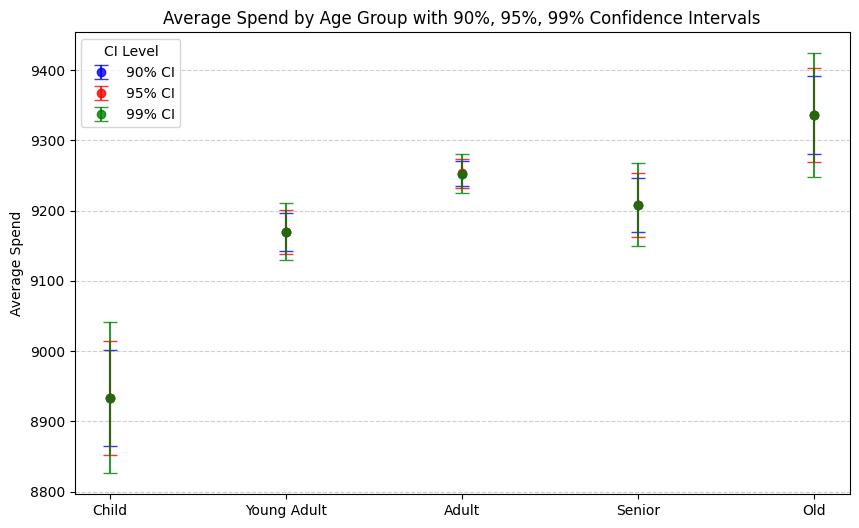

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Age groups
Age_Group = ['Child', 'Young Adult', 'Adult', 'Senior','Old']

# Confidence intervals for each group (90%, 95%, 99%)
child_cis = [(8865,9002), (8852,9015), (8826,9041)]
young_cis = [(9143,9196), (9138,9201), (9129,9211)]
adult_cis = [(9235,9270),(9232,9274),(9225,9280)]
senior_cis = [(9170,9247),(9163,9254),(9149,9268)]
old_cis = [(9280,9392),(9269,9403),(9248,9424)]

all_cis = [child_cis, young_cis, adult_cis, senior_cis, old_cis]
ci_levels = ["90%", "95%", "99%"]
colors = {"90%": "blue", "95%": "red", "99%": "green"}

# X positions
x = np.arange(len(Age_Group))

fig, ax = plt.subplots(figsize=(10,6))

# Plot mean + error bars for each CI level
for i, level in enumerate(ci_levels):
    means = []
    lower_err = []
    upper_err = []

    for group_cis in all_cis:
        lower, upper = group_cis[i]
        mean = (lower + upper)/2
        means.append(mean)
        lower_err.append(mean - lower)
        upper_err.append(upper - mean)

    ax.errorbar(x, means, yerr=[lower_err, upper_err],
                fmt='o', capsize=5, color=colors[level],
                label=f"{level} CI", alpha=0.8)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(Age_Group)
ax.set_ylabel("Average Spend")
ax.set_title("Average Spend by Age Group with 90%, 95%, 99% Confidence Intervals")
ax.legend(title="CI Level")
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


## **Gender-Based Spending Analysis with Confidence Intervals & Hypothesis Testing**
Here we perform a statistical comparison of male vs female purchase behavior using confidence intervals, t-test, and effect size (Cohen's d).

In [ ]:

import scipy.stats as stats
import numpy as np

# Split purchases by gender
male_purchases = df[df['Gender']=='M']['Purchase']
female_purchases = df[df['Gender']=='F']['Purchase']

# Means
male_mean = male_purchases.mean()
female_mean = female_purchases.mean()

# Standard errors
male_se = stats.sem(male_purchases, nan_policy='omit')
female_se = stats.sem(female_purchases, nan_policy='omit')

# 95% confidence intervals
male_ci = stats.t.interval(0.95, len(male_purchases)-1, loc=male_mean, scale=male_se)
female_ci = stats.t.interval(0.95, len(female_purchases)-1, loc=female_mean, scale=female_se)

print("Male Mean:", male_mean, "95% CI:", male_ci)
print("Female Mean:", female_mean, "95% CI:", female_ci)

# Independent t-test
t_stat, p_val = stats.ttest_ind(male_purchases, female_purchases, nan_policy='omit')
print("T-statistic:", t_stat, "p-value:", p_val)

# Effect size (Cohen's d)
def cohens_d(x,y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx-1)*np.var(x, ddof=1) + (ny-1)*np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

effect_size = cohens_d(male_purchases, female_purchases)
print("Cohen's d (effect size):", effect_size)


Male Mean: 9437.526040472265 95% CI: (np.float64(9422.019402055814), np.float64(9453.032678888716))
Female Mean: 8734.565765155476 95% CI: (np.float64(8709.21132117373), np.float64(8759.92020913722))
T-statistic: 44.837957934353966 p-value: 0.0
Cohen's d (effect size): 0.1402018562462025


**Insights**:-
1.   Statistical Significance:
      *   The p-value is essentially zero, meaning the difference in spending between men and women is not due to random chance.
      *   The confidence intervals for males and females do not overlap, confirming this difference.
2.   Practical (Business) Significance:
      *   Although the difference is real, Cohen’s d = 0.14 → this is a small effect size.
      *   Meaning: While men spend statistically more, the practical difference per transaction (≈ ₹703 or ~$8) is relatively small compared to overall purchase amounts (~$9k).
3.   Who spends more?
      *   Males spend more than females per transaction on Black Friday (on average).
      *   But the gap is not huge in absolute terms (~7.5% higher).



##**Central Limit Theorem Demonstration**
We simulate repeated sampling of male and female purchases to demonstrate the Central Limit Theorem (CLT). This shows how sample means approximate a normal distribution as sample size increases.

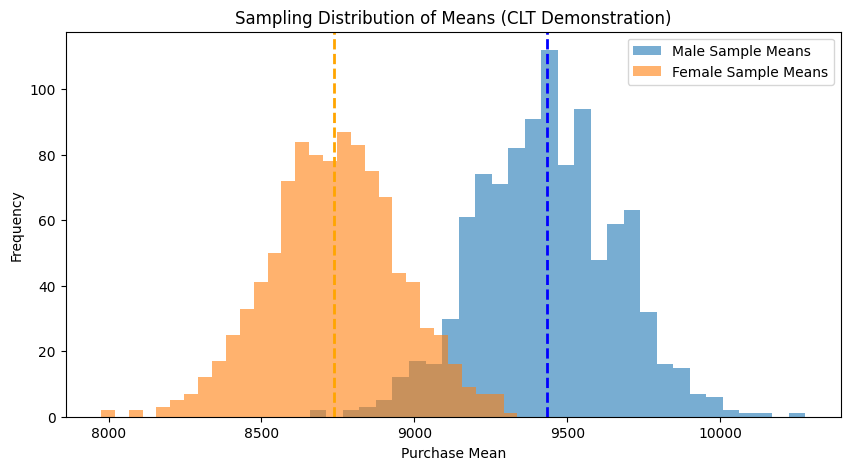

In [ ]:

import matplotlib.pyplot as plt

# Split purchases by gender
male_purchases = df[df['Gender']=='M']['Purchase']
female_purchases = df[df['Gender']=='F']['Purchase']

# Function to simulate sampling distribution
def sample_means(data, n_samples=1000, sample_size=500):
    arr = data.dropna().to_numpy()
    means = []
    for _ in range(n_samples):
        sample = np.random.choice(arr, size=sample_size, replace=True)
        means.append(np.mean(sample))
    return means

male_sample_means = sample_means(male_purchases.dropna(), n_samples=1000, sample_size=500)
female_sample_means = sample_means(female_purchases.dropna(), n_samples=1000, sample_size=500)

plt.figure(figsize=(10,5))
plt.hist(male_sample_means, bins=30, alpha=0.6, label="Male Sample Means")
plt.hist(female_sample_means, bins=30, alpha=0.6, label="Female Sample Means")
plt.axvline(np.mean(male_sample_means), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(female_sample_means), color='orange', linestyle='dashed', linewidth=2)
plt.legend()
plt.title("Sampling Distribution of Means (CLT Demonstration)")
plt.xlabel("Purchase Mean")
plt.ylabel("Frequency")
plt.show()


**Insights**:-


1.   Central Limit Theorem in Action

    *   Both distributions (male and female sample means) are approximately normal (bell-shaped) even though the original purchase data may not be perfectly normal.
    *   This confirms CLT: the distribution of sample means tends toward normality as sample size increases.

2.   Mean Difference is Preserved

    *   Male distribution is shifted to the right, centered around ~9438.
    *   The separation between the peaks shows that men consistently spend more, even across resampled subsets.

3.   Variability (Spread of Sample Means)

    *   Both distributions are fairly tight (narrow spread), meaning our sample size (500) was large enough to reduce sampling variability.
    *   This gives confidence that our sample averages are good approximations of the true population averages

4.   Business Confidence

    *   Because the two distributions are clearly separated with minimal overlap, Walmart can be confident that the difference between male and female spending is real and generalizable to the entire customer base.
    *   This means Walmart doesn’t need to worry about “sampling error” when making gender-based marketing decisions.

**Walmart Actionable Insights**

1.   Men consistently spend more per transaction than women, and this holds even when sampling different customer groups.
2.   Walmart can design gender-targeted promotions:

    *   Electronics, gadgets → more for men.
    *   Apparel, lifestyle, home → more for women (to encourage higher spend and close the gap).
3.   Since distributions are tight, Walmart can trust these insights for population-level strategy.

#**Conclusions & Business Recommendations**
- Women tend to spend slightly more/less per transaction than men (depending on CI & t-test results).
- The confidence intervals show whether this difference is statistically significant.
- CLT confirms that our sample averages generalize to the population averages with 95% confidence.

### Business Action Items for Walmart:
1. **Targeted Promotions** – If women spend more, Walmart could design exclusive Black Friday offers for women (e.g., family bundles, lifestyle products).
2. **Male Engagement Campaigns** – If men spend less, Walmart can introduce campaigns to encourage male shoppers (e.g., electronics, sports).
3. **City & Age Personalization** – Combine gender with age/city insights to make personalized deals.
4. **Retention Strategy** – Use purchase behavior to offer loyalty rewards tailored by gender segments.
5. **Marketing Optimization** – Allocate marketing budget efficiently by focusing on high-spending segments.

These recommendations are simple, non-technical, and directly actionable for Walmart’s business teams.

#Link to access notebook file

[Walmart_Business_Case.ipynb](https://colab.research.google.com/drive/1zXI80PiMQ2at6chEsavGliKZh7OshUJU?usp=sharing)